# Logistic regression!!

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
# Visualization
import matplotlib.pyplot as plt

# Modeling and Prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [3]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train.csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [7]:
test_data['Survived']=-1
train_data.columns
df_test0=test_data.reindex(columns=train_data.columns)
df_test0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,-1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,-1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,-1,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,-1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_all=pd.concat([train_data,df_test0]).copy()
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_all.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
dg=df_all[['Sex','Pclass','Age']].dropna().copy()
dg.head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


In [17]:
def fill_age(row):
    Age = row[0]
    Pclass = row[1]
    if pd.isnull(Age):
        if Pclass==1: return 38
        elif Pclass==2: return 30
        else: return 25
    else: return Age

df_all['Age']=df_all[['Age','Pclass']].apply(fill_age,axis=1)

<Axes: xlabel='Pclass', ylabel='Age'>

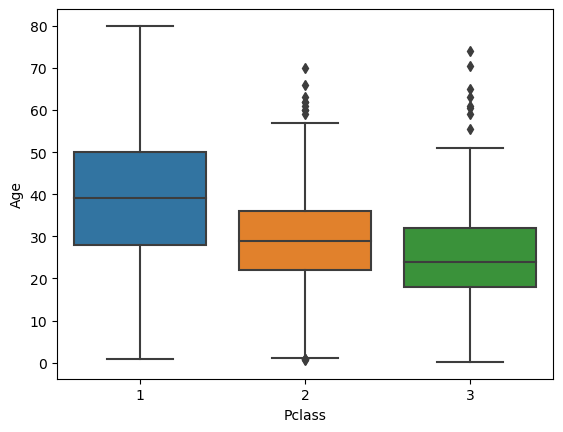

In [12]:
dg['Age'] = pd.to_numeric(dg['Age'])
import seaborn as sns
sns.boxplot(x='Pclass', y='Age', data=dg)

<Axes: xlabel='Sex', ylabel='Age'>

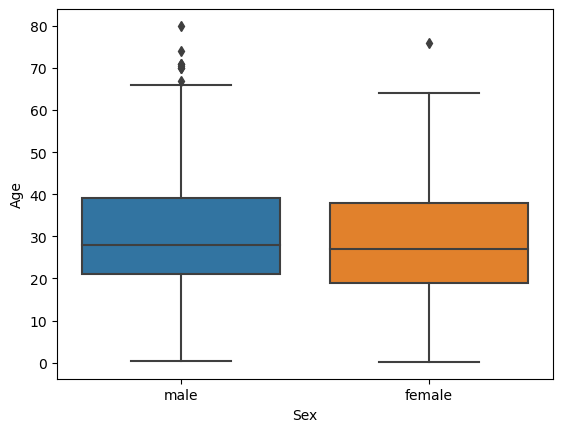

In [13]:
sns.boxplot(x='Sex', y='Age', data=dg)

In [14]:
df_all['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [18]:
df_all['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [21]:
not_null = np.invert(df_all['Fare'].isnull())
fares_num = pd.to_numeric(df_all['Fare'][not_null])
avg = np.average(fares_num)


In [22]:
df_all.loc[df_all['Fare'].isnull(),'Fare']= avg

In [23]:
df_all['Embarked'].value_counts(normalize=True)

Embarked
S    0.699311
C    0.206580
Q    0.094109
Name: proportion, dtype: float64

In [24]:
df_all.loc[df_all['Embarked'].isnull(),'Embarked']='S' #assign 'S' to all the missing values 

In [25]:
df_all['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
df_all.loc[df_all['Cabin'].isnull(),'Cabin']='XX'

In [29]:
df_all['Deck']=df_all['Cabin'].str.extract('(.)')
print(df_all['Deck'].unique())

['X' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [30]:
df_all.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [32]:
n=df_all['Name'].str.extract('.+?,\s(.+?).\s')[0]
print(n)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: 0, Length: 1309, dtype: object


In [33]:
df_all['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [41]:
df=df_all.copy()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,XX,S,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,XX,S,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,XX,S,X


In [46]:
# df.drop('Name', axis=1, inplace=True)
# df.drop('Ticket', axis=1, inplace=True)
# df.drop('SibSp', axis=1, inplace=True)
# df.drop('Parch', axis=1, inplace=True)
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck
0,1,0,3,male,22.0,7.2500,S,X
1,2,1,1,female,38.0,71.2833,C,C
2,3,1,3,female,26.0,7.9250,S,X
3,4,1,1,female,35.0,53.1000,S,C
4,5,0,3,male,35.0,8.0500,S,X


In [48]:
# df.to_csv('titanic_clean.csv',index=False)

In [58]:
# sex=pd.get_dummies(df['Sex'],drop_first=True)
# embarked=pd.get_dummies(df['Embarked'],drop_first=True)
# df=pd.concat([df,sex,embarked], axis=1)
# df.drop('Embarked', axis=1, inplace=True)
# df.drop('Sex', axis=1, inplace=True)
df.drop('Deck',axis =1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,True,False,True
1,2,1,1,38.0,71.2833,False,False,False
2,3,1,3,26.0,7.9250,False,False,True
3,4,1,1,35.0,53.1000,False,False,True
4,5,0,3,35.0,8.0500,True,False,True


In [59]:
train=df[df['Survived']>=0].copy()
test=df[df['Survived']==-1].copy()
test=test.drop('Survived',axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,True,False,True
1,2,1,1,38.0,71.2833,False,False,False
2,3,1,3,26.0,7.9250,False,False,True
3,4,1,1,35.0,53.1000,False,False,True
4,5,0,3,35.0,8.0500,True,False,True


In [60]:
y = train['Survived']
X = train.drop('Survived',axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [62]:
lrm = LogisticRegression()
lrm.fit(X_train,y_train)

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_test_pred=lrm.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

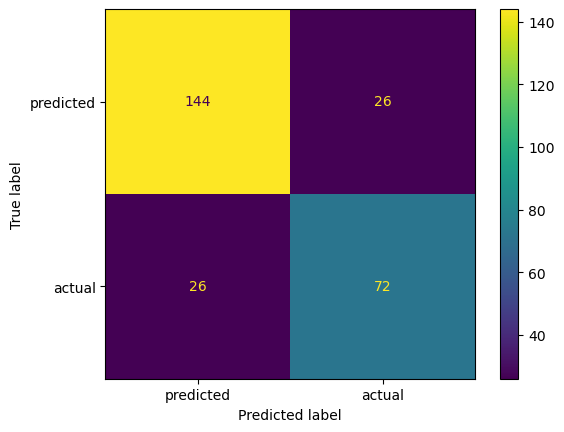

In [71]:
cm = confusion_matrix(y_test, y_test_pred)
clf= ['predicted','actual']
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf)
disp.plot()
plt.show()

In [72]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,True,False,True
1,2,1,1,38.0,71.2833,False,False,False
2,3,1,3,26.0,7.9250,False,False,True
3,4,1,1,35.0,53.1000,False,False,True
4,5,0,3,35.0,8.0500,True,False,True


# Sales prediction - Kaggle
<b> used a sample dataset that I found somewhere on the internet </b>

In [73]:
data_df  = pd.read_csv('/Users/annikaseo-yeonkim/Downloads/Electric_Production.csv')

In [75]:
data_df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [74]:
def groupby_timeframe(df_use,
                      timeframe,
                      method='mean',
                      calc_cols=["1_GAS_PRESSURE", "2_GAS_PRESSURE", "1_ELECTRICITY", "2_ELECTRICITY"]):
    """
    Given input df, group by the given timeframe and apply function given by method

    Input:
     - df_use: input df
     - timeframe: one of ['SEC', 'MIN', 'HOUR', 'DAY']
     - method: one of ['mean', 'std', 'min', 'max']
    """

    if (method == 'mean'):
        df_result = df_use[[timeframe] + calc_cols].groupby(by=[timeframe]).mean()
    elif (method == 'std'):
        df_result = df_use[[timeframe] + calc_cols].groupby(by=[timeframe]).std()
    elif (method == 'min'):
        df_result = df_use[[timeframe] + calc_cols].groupby(by=[timeframe]).min()
    elif (method == 'max'):
        df_result = df_use[[timeframe] + calc_cols].groupby(by=[timeframe]).max()
    
    return df_result

In [79]:
data_df['DATE'] = pd.to_datetime(data_df['DATE'])
data_df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [82]:
data_df.columns=["Month","Sales"]
data_df.head()

,Month,Sales
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [84]:
data_df.set_index('Month',inplace=True)
data_df.head()

,Sales
Month,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [85]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_df['Sales'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_df['Sales'])

ADF Test Statistic : -2.2569903500472313
p-value : 0.18621469116587241
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 


In [101]:
data_df['Sales First Difference'] = data_df['Sales'] - data_df['Sales'].shift(1)
data_df['Seasonal First Difference']=data_df['Sales'] - data_df['Sales'].shift(12)
data_df.head()

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN,NaN
1985-03-01,62.4502,-8.2218,NaN,NaN
1985-04-01,57.4714,-4.9788,NaN,NaN
1985-05-01,55.3151,-2.1563,NaN,NaN


In [102]:
adfuller_test(data_df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.67348202338176
p-value : 8.812644938088942e-07
#Lags Used : 12
Number of Observations : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


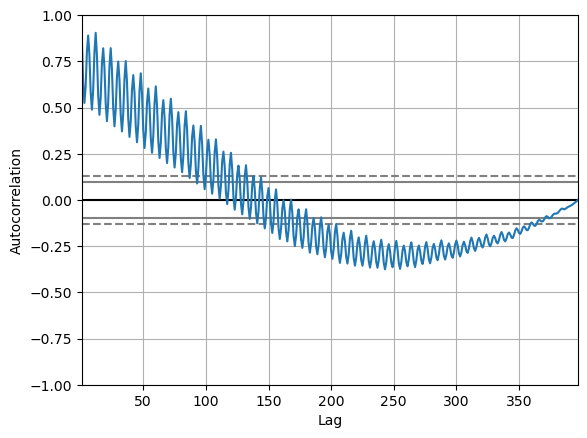

In [103]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_df['Sales'])
plt.show()

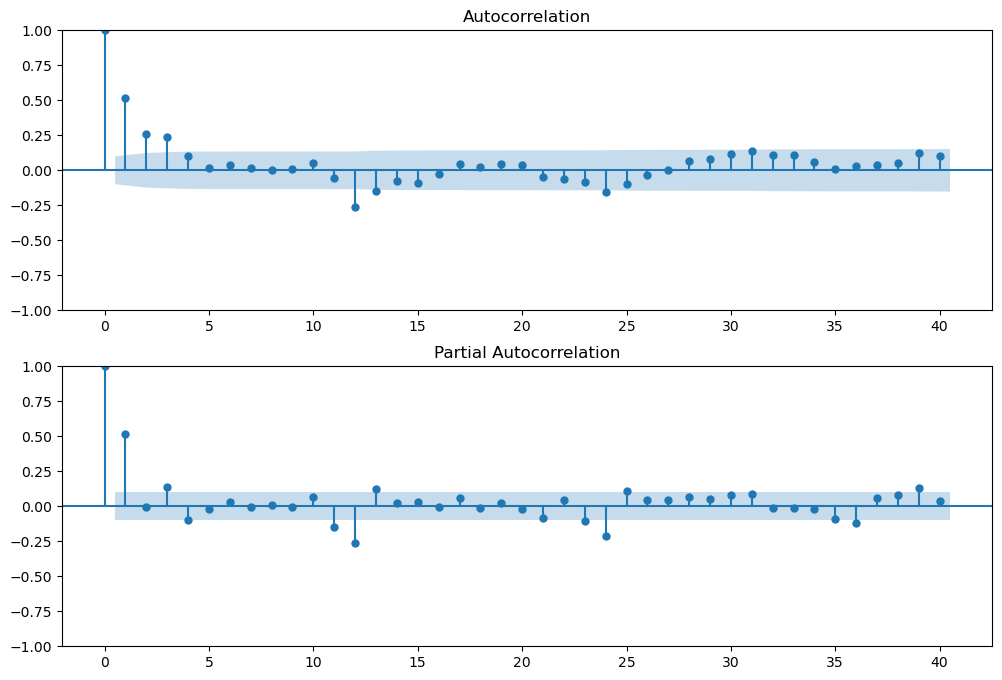

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)


In [96]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(data_df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Tue, 04 Jun 2024   AIC                           2623.589
Time:                        15:00:45   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.000      36.965      49.885
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.72   Prob(JB):                         0.49
Heteroskedasticity (H):               2.97   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
start = 385
end = start + 13
start1 = end + 1
end1 = start1 + 13
start, end, start1, end1

(385, 398, 399, 412)

<Axes: xlabel='Month'>

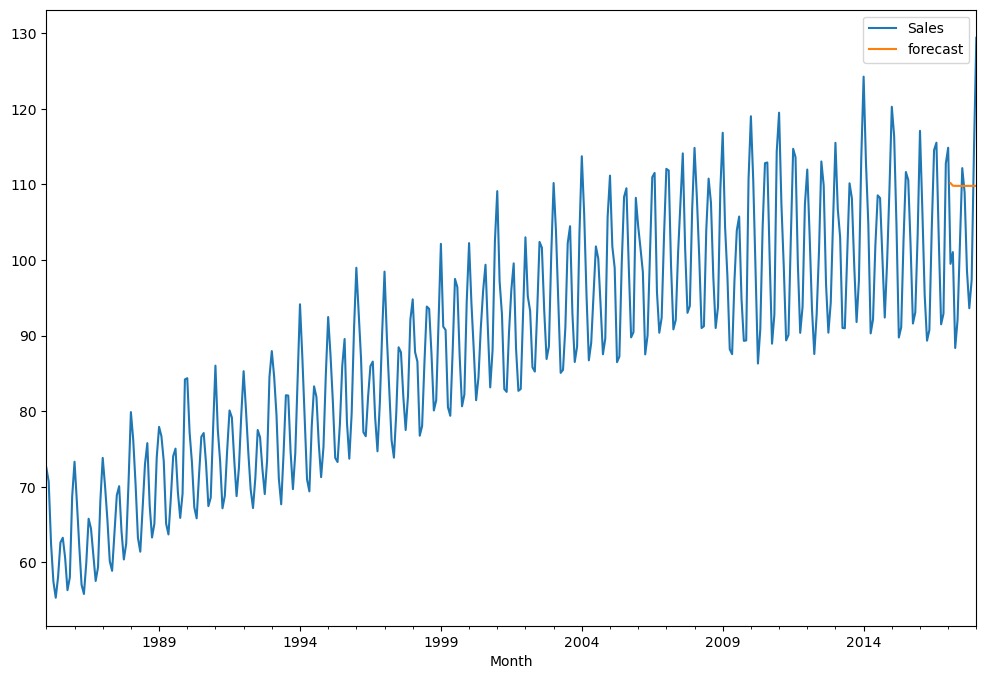

In [100]:
data_df['forecast']=model_fit.predict(start=start,end=end,dynamic=True)
data_df[['Sales','forecast']].plot(figsize=(12,8))